In [117]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.gridspec import GridSpec



In [70]:
def  desplay_list_images(num_cols,image_files , path):
    num_rows = 2
    num_cols = len(image_files) // num_rows
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    for i, image_file in enumerate(image_files):
        row = i // num_cols
        col = i % num_cols
        image_path = os.path.join(path, image_file)
        image = cv2.imread(image_path)

        # Display the image in the corresponding subplot
        axes[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        axes[row, col].set_title(image_file)
        axes[row, col].axis('off')  # Turn off axis labels
    return 'Done'
def read_image(path, image_file):
    image_path = os.path.join(path, image_file)
    return  cv2.imread(image_path)
def display_image(images, title):
    fig, axes = plt.subplots(1, len(images), figsize=(10, 5))
    i= 0
    for image in images :
        axes[i].imshow(image)
        axes[i].set_title(title)
        axes[i].axis('off')
        i= i+1
    plt.show()
    return  'done'


# <span style="color:red; font-style:italic; text-decoration:underline;"># A) - data  preprocessing</span>

## <span style="color:green; font-style:italic; text-decoration:underline;"> 1) - display a sample of our  data </span>

###  <span style="color:blue; font-style:italic; "> - The dataset being used in this notebook pertains to brain tumors and consists of two classes: one representing a healthy brain and the other indicating a diseased brain with a tumor.</span>

 display healthy brain images -----------------------------------------------------------------


'Done'

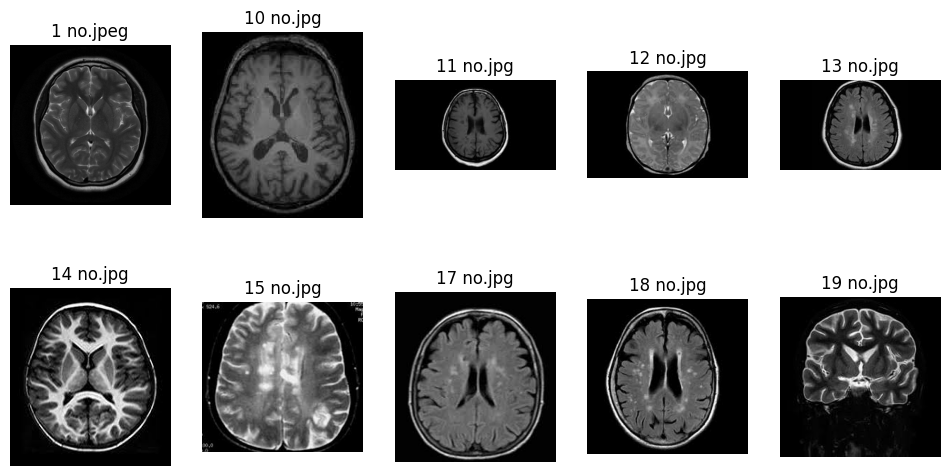

In [30]:
healthy_br_path = 'data_brain/no'
sick_br_path = 'data_brain/yes'
healthy_br_images = [f for f in os.listdir(healthy_br_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
sick_br_images = [f for f in os.listdir(sick_br_path) if f.endswith(('.jpg', '.png', '.jpeg', '.gif'))]
print(' display healthy brain images -----------------------------------------------------------------')
desplay_list_images(num_cols,healthy_br_images[:10],healthy_br_path)

 display sick brain images -----------------------------------------------------------------


'Done'

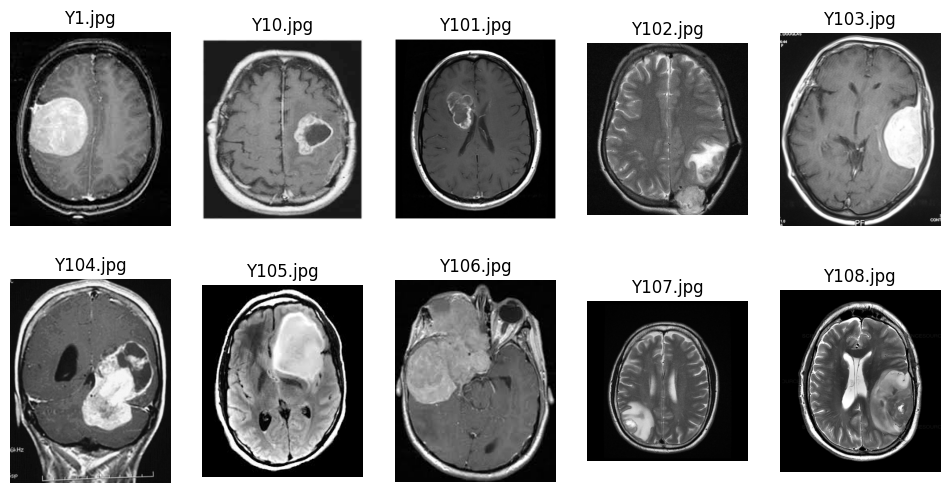

In [24]:
print(' display sick brain images -----------------------------------------------------------------')
desplay_list_images(num_cols,sick_br_images[:10] , sick_br_path)

## <span style="color:green; font-style:italic; text-decoration:underline;"> 2) -Choosing a data sample for preliminary processing before delving into the entire dataset is a wise approach.</span>

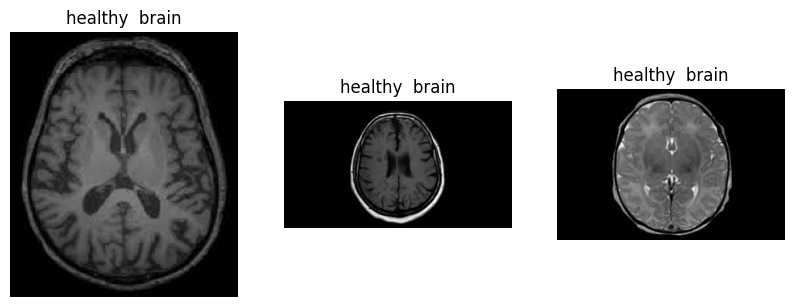

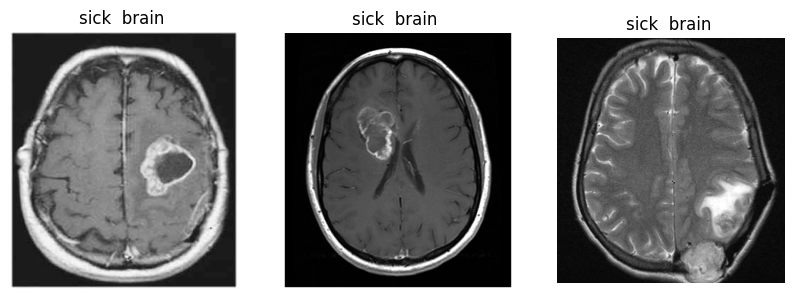

'done'

In [230]:
h_1 = read_image(healthy_br_path , healthy_br_images[1])
h_2 = read_image(healthy_br_path , healthy_br_images[2])
h_3 = read_image(healthy_br_path , healthy_br_images[3])
h_images = [h_1 ,h_2,h_3]
display_image(h_images, 'healthy  brain')


s_1 = read_image(sick_br_path , sick_br_images[1])
s_2 = read_image(sick_br_path , sick_br_images[2])
s_3 = read_image(sick_br_path , sick_br_images[3])
s_images = [s_1 ,s_2,s_3]
display_image(s_images, 'sick  brain ')

###  <span style="color: green ; font-style:italic; "> 3)- Contrast Enhancement: </span>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from matplotlib.gridspec import GridSpec

def contrast(images):
    enhanced_images = []
    for image in images:
        enhanced_image = exposure.equalize_hist(image)
        enhanced_images.append(enhanced_image)
    return enhanced_images

def apply_contrast_enhancement_and_display(images):
    enhanced_images = []
    for image in images:
        enhanced_image = exposure.equalize_hist(image)
        enhanced_images.append(enhanced_image)
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and enhanced)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try  :
        for i in range(num_images):
            row, col = divmod(i, num_cols)
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(enhanced_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title("Enhanced")

        plt.tight_layout()
    except : pass
    plt.show()

###  <span style="color:orange ; font-style:italic; "> ---- > Adjust the contrast and brightness of healthy brain images : </span>

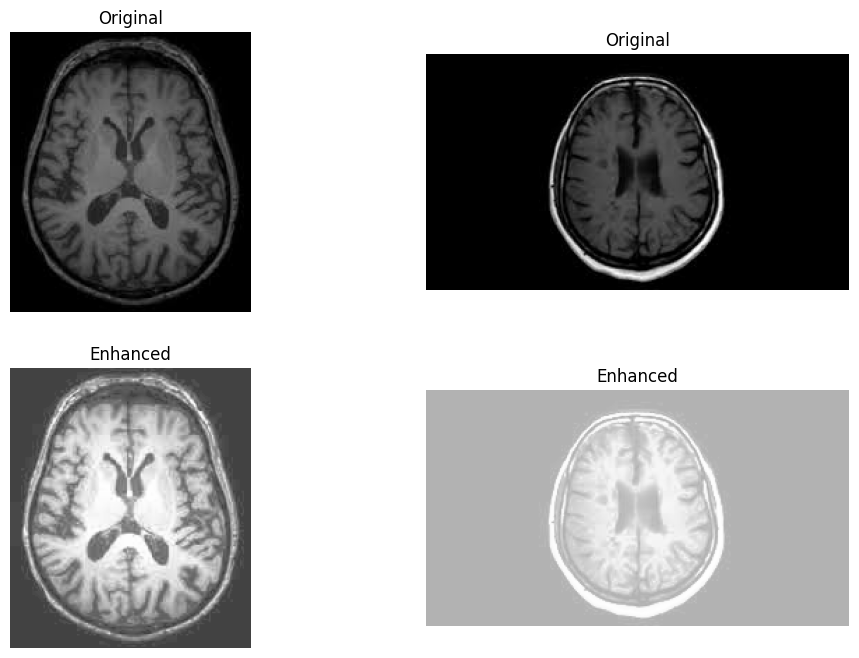

In [181]:
apply_contrast_enhancement_and_display(h_images)

###  <span style="color:orange ; font-style:italic; "> ---- > Adjust the contrast and brightness of sick brain images : </span>

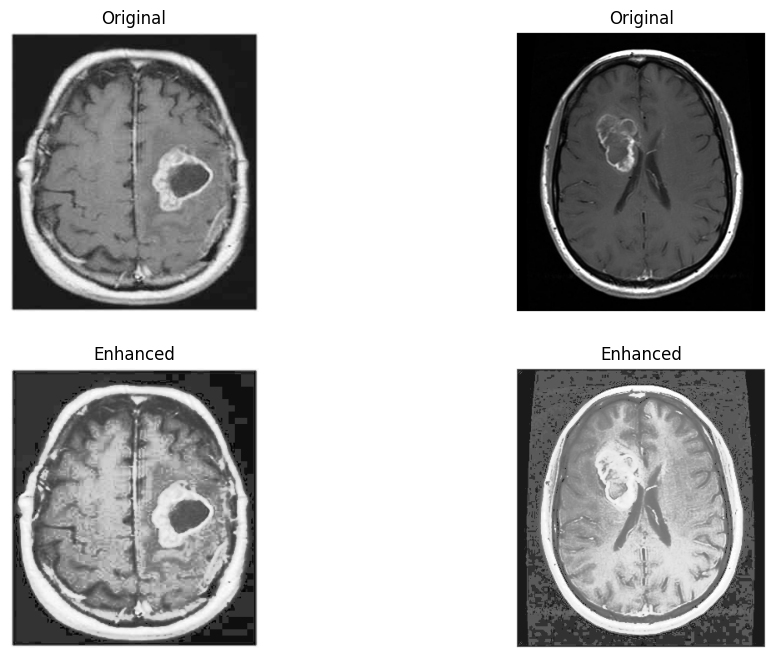

In [183]:
apply_contrast_enhancement_and_display(s_images)

In [232]:
h_images = contrast(h_images)
s_images = contrast(s_images)

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


## <span style="color:green; font-style:italic; text-decoration:underline;"> 4) - Convert the color of the images to grayscale. </span>

###  <span style="color:blue; font-style:italic; "> The function will convert each color image to grayscale and display them side by side in a table format</span>

In [186]:


def convert_and_display_grayscale_images(image_list):
    grayscale_images = []

    for color_image in image_list:
        grayscale_image = np.dot(color_image[..., :3], [0.5989, 0.5870, 0.5140])
        grayscale_images.append(grayscale_image)
    num_images = len(image_list)
    fig, axes = plt.subplots(2, num_images, figsize=(4 * num_images, 8))

    for i in range(num_images):
        axes[0, i].imshow(image_list[i])
        axes[0, i].set_title("Original")
        axes[1, i].imshow(grayscale_images[i], cmap='gray')
        axes[1, i].set_title("Grayscale")
        axes[1, i].axis('off')

    plt.show()


###  <span style="color:orange ; font-style:italic; "> ---- > the  grayscale images of healthy  brain images : </span>

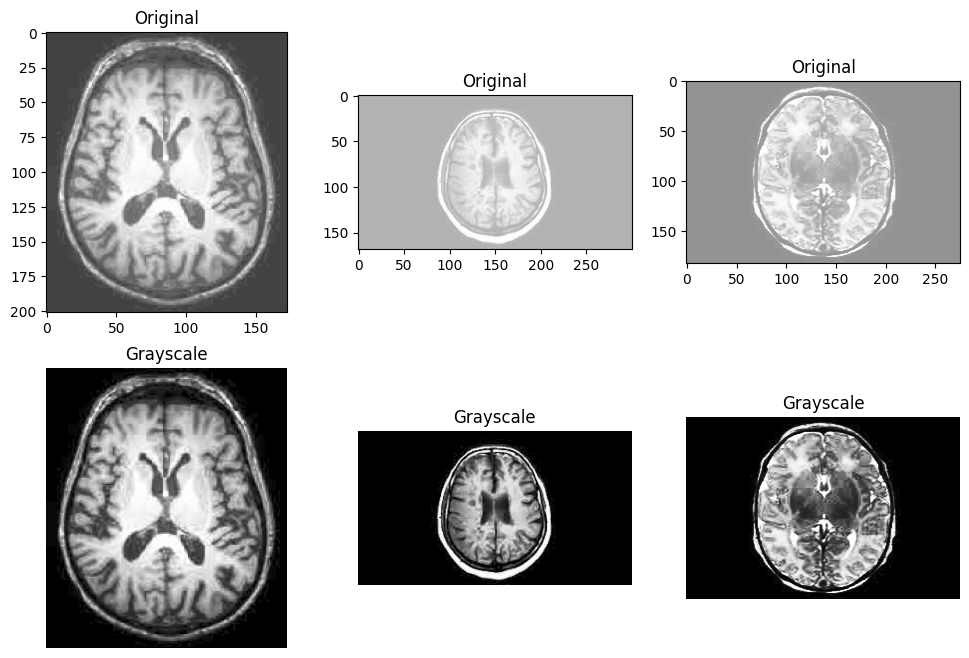

In [187]:
convert_and_display_grayscale_images(h_images)

###  <span style="color:orange ; font-style:italic; "> ---- > the  grayscale images of sick brain images : </span>

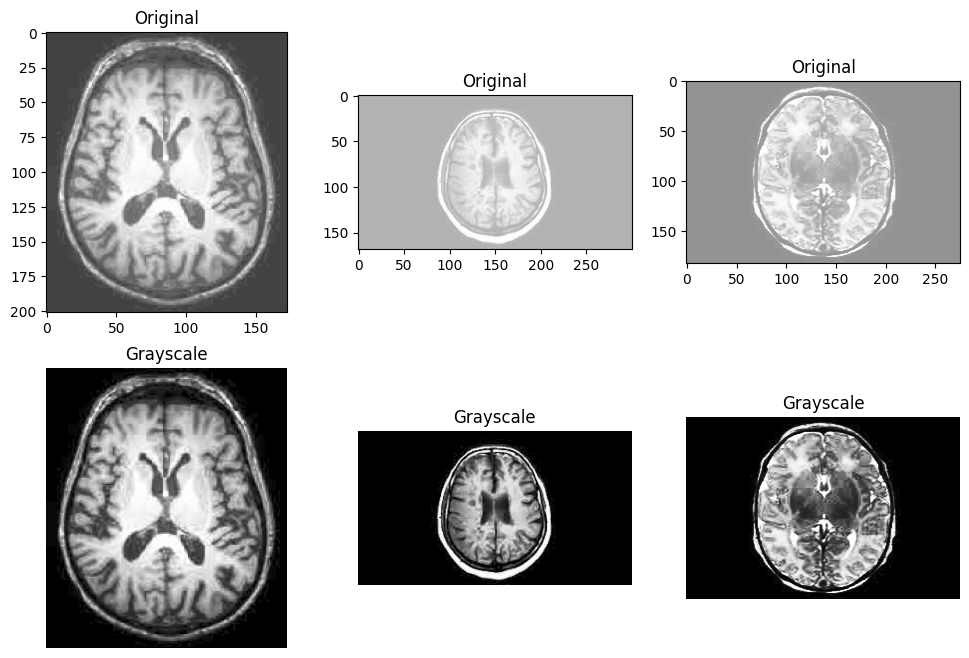

In [188]:
convert_and_display_grayscale_images(h_images)

###  <span style="color:blue ; font-style:italic; "> ---- > It appears that transforming the original images into grayscale images could potentially assist in identifying the image contours. </span>

## <span style="color:green; font-style:italic; text-decoration:underline;"> 5) - Elimination of noise. </span>

## <span style="color:brown ; font-style:italic; text-decoration:underline;"> -- a) - Mean filter </span>

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter
from matplotlib.gridspec import GridSpec

def Mean_filter(images, size=3):
    filtered_images = []
    for image in images:
        filtered_image = uniform_filter(image, size=size)
        filtered_images.append(filtered_image)
    return filtered_images

def apply_mean_filter_and_display(images, size=4):
    filtered_images = []
    for image in images:
        filtered_image = uniform_filter(image, size=size)
        filtered_images.append(filtered_image)
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and filtered)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try  :
        for i in range(num_images):
            row, col = divmod(i, num_cols)
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(filtered_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title("Filtered (Mean)")

        plt.tight_layout()
    except : pass
    plt.show()


###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the mean_filter on healthy images : </span>

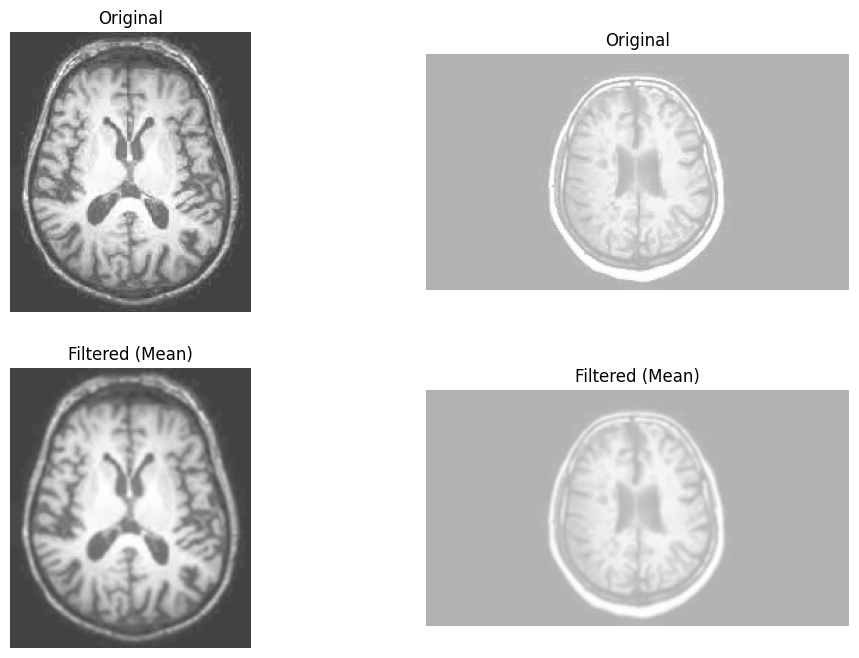

In [190]:
apply_mean_filter_and_display(h_images, size=3)

###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the mean_filter on sick brain images : </span>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


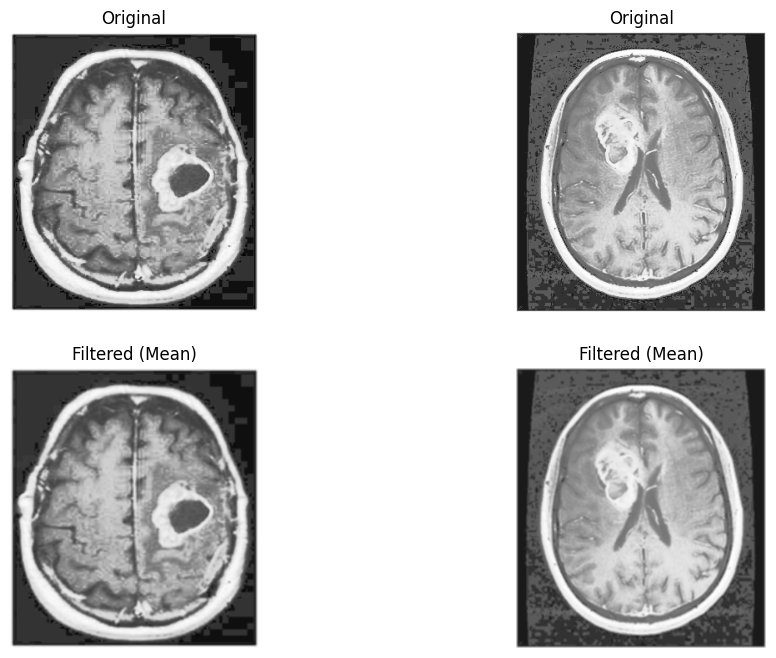

In [191]:
apply_mean_filter_and_display(s_images, size=3)

## <span style="color:brown ; font-style:italic; text-decoration:underline;"> -- b) -gaussian_filter </span>

In [133]:
def gaussian_filter_images(images, sigma=1):
    filtered_images = []
    for image in images:
        filtered_image = gaussian_filter(image, sigma=sigma)
        filtered_images.append(filtered_image)
    return filtered_images 

def apply_gaussian_filter_and_display(images, sigma=1):
    filtered_images = []
    for image in images:
        filtered_image = gaussian_filter(image, sigma=sigma)
        filtered_images.append(filtered_image)
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and filtered)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try :
        for i in range(num_images):
            row, col = divmod(i, num_cols)
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(filtered_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title("Filtered (Gaussian)")
        plt.tight_layout()
    except  :pass
    plt.show()

###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the gaussian_filter on healthy images : </span>

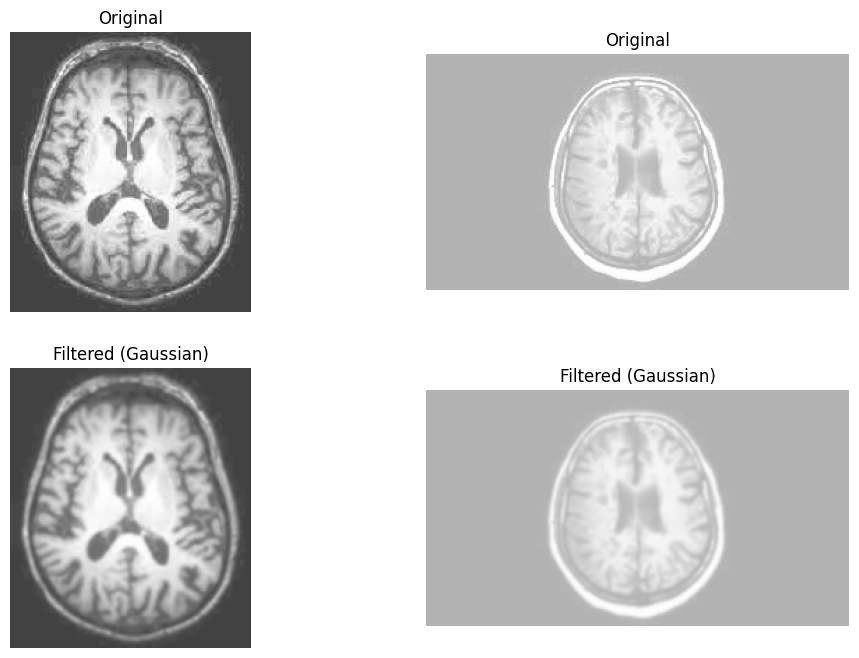

In [192]:
apply_gaussian_filter_and_display(h_images, sigma=1)

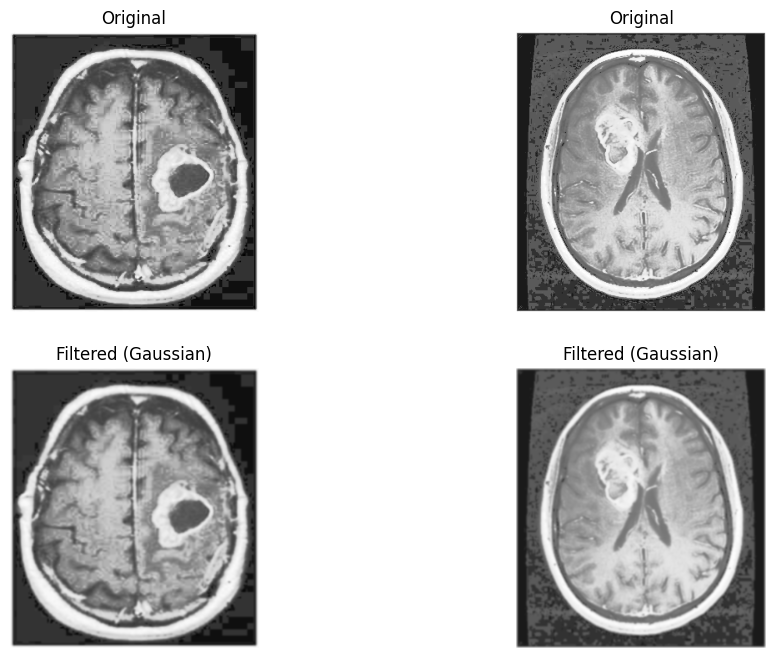

In [193]:
apply_gaussian_filter_and_display(s_images, sigma=1)

## <span style="color:brown ; font-style:italic; text-decoration:underline;"> -- c ) - Median filter </span>

In [194]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from matplotlib.gridspec import GridSpec

def Median_filter(images, size=3):
    filtered_images = []
    for image in images:
        filtered_image = median_filter(image, size=size)
        filtered_images.append(filtered_image)
    return filtered_images

def apply_median_filter_and_display(images, size=3):
    filtered_images = []
    for image in images:
        filtered_image = median_filter(image, size=size)
        filtered_images.append(filtered_image)
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and filtered)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try : 
        for i in range(num_images):
            row, col = divmod(i, num_cols)
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(filtered_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title(f"Filtered (Median, {size}x{size})")

        plt.tight_layout()
    except : pass


###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the Median_filter on healthy brain images : </span>

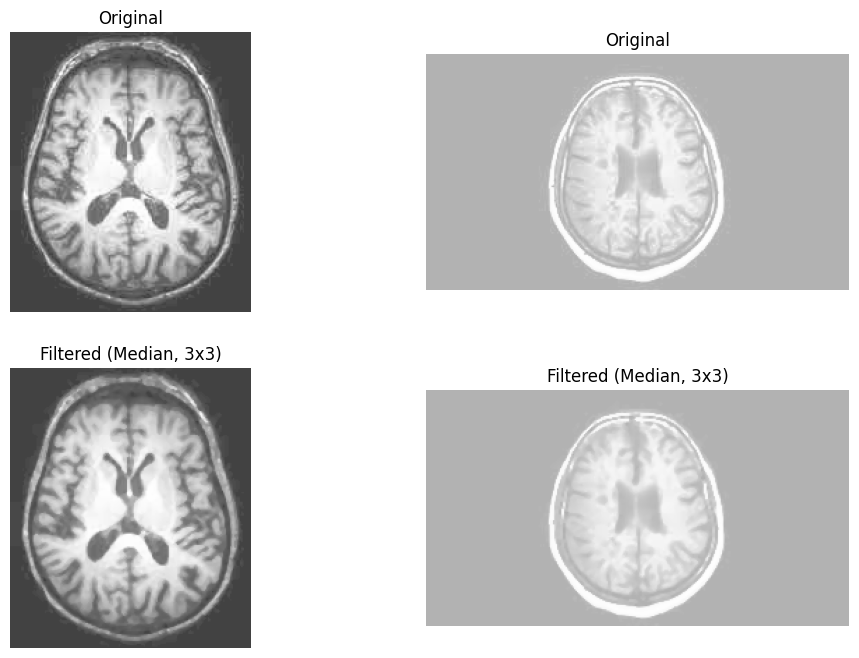

In [195]:
apply_median_filter_and_display(h_images, size=3)

###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the Median_filter on sick brain images : </span>

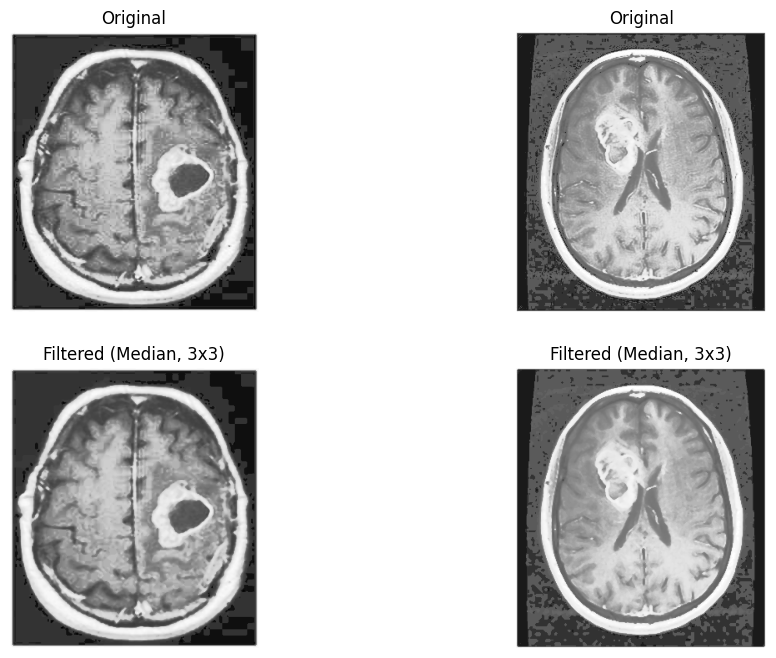

In [196]:
apply_median_filter_and_display(s_images, size=3)

## <span style="color:brown ; font-style:italic; text-decoration:underline;"> -- c ) - bilateral filter </span>

In [206]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

def Bilateral_filter(images, d=20, sigma_color=75, sigma_space=75):
    filtered_images = []
    # Apply bilateral filter to each image
    for image in images:
        filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
        filtered_images.append(filtered_image)
    return filtered_images

def apply_bilateral_filter_and_display(images, d=20, sigma_color=75, sigma_space=75):
    filtered_images = []
    # Apply bilateral filter to each image
    for image in images:
        filtered_image = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
        filtered_images.append(filtered_image)
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and filtered)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try :
        for i in range(num_images):
            row, col = divmod(i, num_cols)
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(filtered_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title("Filtered (Bilateral)")

        plt.tight_layout()
    except : pass
    plt.show()

###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the bilateral filter on healthy brain images : </span>

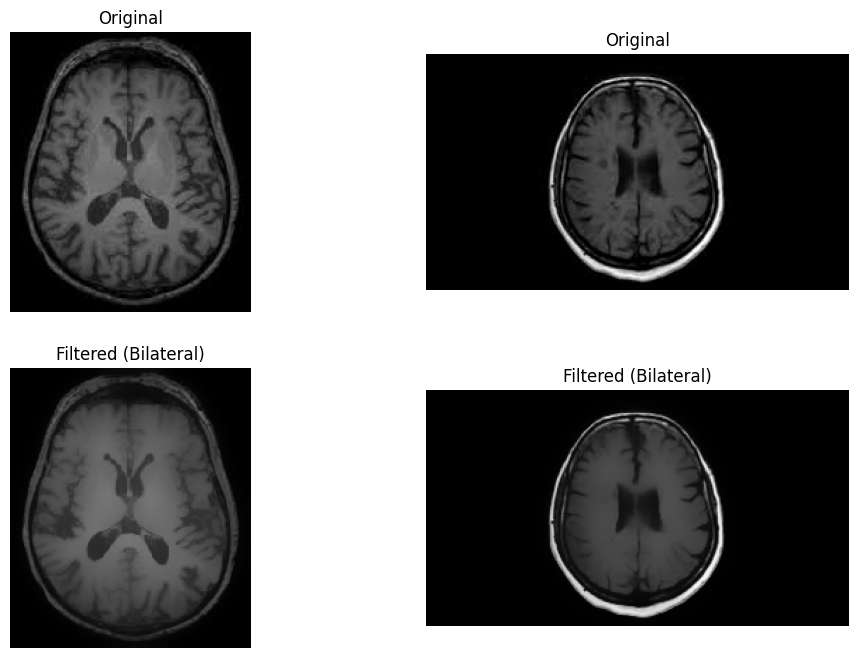

In [207]:
apply_bilateral_filter_and_display(h_images, d=20, sigma_color=75, sigma_space=75)

###  <span style="color:orange ; font-style:italic; "> ---- > applaying  the bilateral filter on sick brain images : </span>

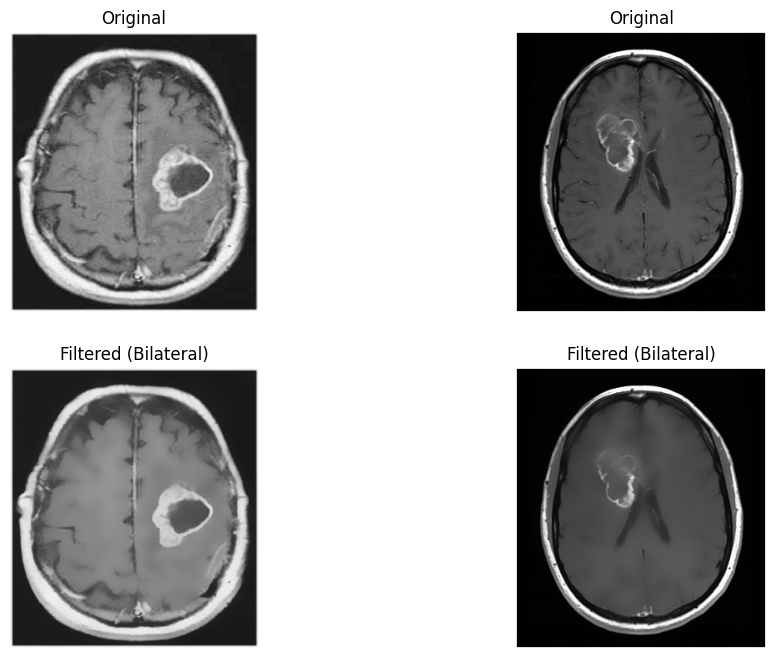

In [169]:
apply_bilateral_filter_and_display(s_images, d=20, sigma_color=75, sigma_space=75)

###  <span style="color:blue ; font-style:italic; "> ---- >It appears that only the bilateral filter has performed well on the images, so I'll continue to use it. Additionally, I plan to test each of the filters again for both edge detection and object segmentation. </span>

## <span style="color:green; font-style:italic; text-decoration:underline;"> 6) - normalize the images . </span>

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
def normalize_images(images):
    normalized_images = []
    for image in images:
        min_val = np.min(image)
        max_val = np.max(image)
        normalized_image = (image - min_val) / (max_val - min_val)
        normalized_images.append(normalized_image)
    return normalized_images

def apply_normalization_and_display(images):
    # Create a list to store the normalized images
    normalized_images = []

    # Apply normalization to each image
    for image in images:
        min_val = np.min(image)
        max_val = np.max(image)
        normalized_image = (image - min_val) / (max_val - min_val)
        normalized_images.append(normalized_image)

    # Create a grid to display images side by side
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and normalized)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try :
        for i in range(num_images):
            row, col = divmod(i, num_cols)

            # Display the original image
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")

            # Display the normalized image
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(normalized_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title("Normalized")

        plt.tight_layout()
    except: pass
    plt.show()

###  <span style="color:orange ; font-style:italic; "> ---- > normalizing  the healthy brain images : </span>

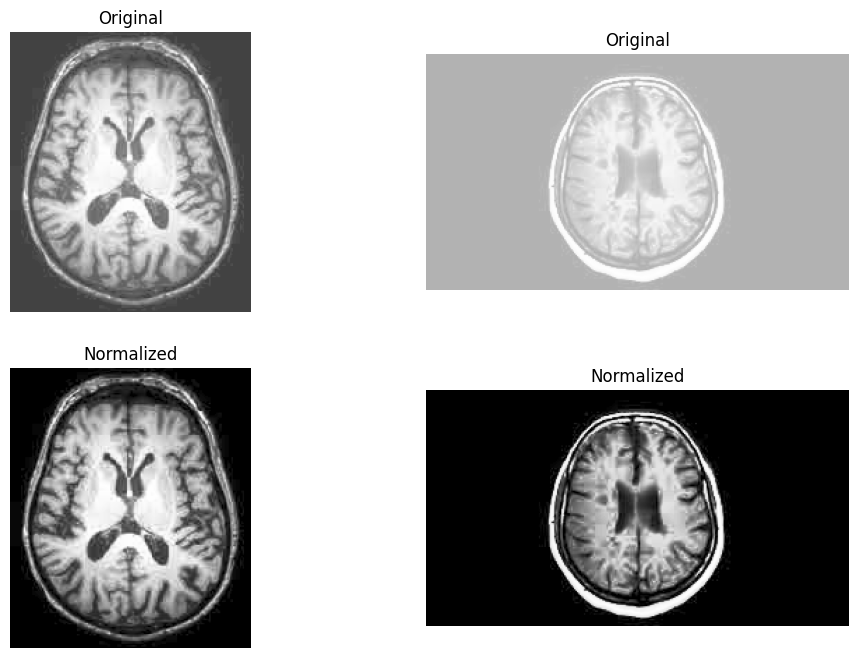

In [214]:
apply_normalization_and_display(h_images)

###  <span style="color:orange ; font-style:italic; "> ---- > normalizing  the sick brain images : </span>

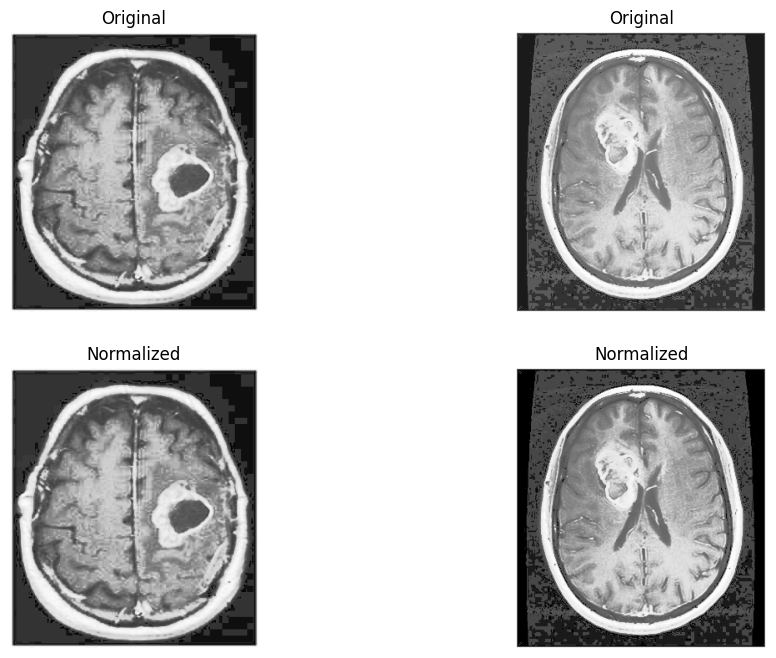

In [211]:
apply_normalization_and_display(s_images)

## <span style="color:green; font-style:italic; text-decoration:underline;"> 7) - Histogram Equalization . </span>

In [220]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from matplotlib.gridspec import GridSpec

def apply_histogram_equalization_and_display(images):
    # Create a list to store the equalized images
    equalized_images = []

    # Apply histogram equalization to each image
    for image in images:
        equalized_image = exposure.equalize_hist(image)
        equalized_images.append(equalized_image)

    # Create a grid to display images side by side
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and equalized)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try :
        for i in range(num_images):
            row, col = divmod(i, num_cols)

            # Display the original image
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i], cmap='gray')
            ax1.axis('off')
            ax1.set_title("Original")

            # Display the equalized image
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(equalized_images[i], cmap='gray')
            ax2.axis('off')
            ax2.set_title("Equalized")

        plt.tight_layout()
    except : pass
    plt.show()


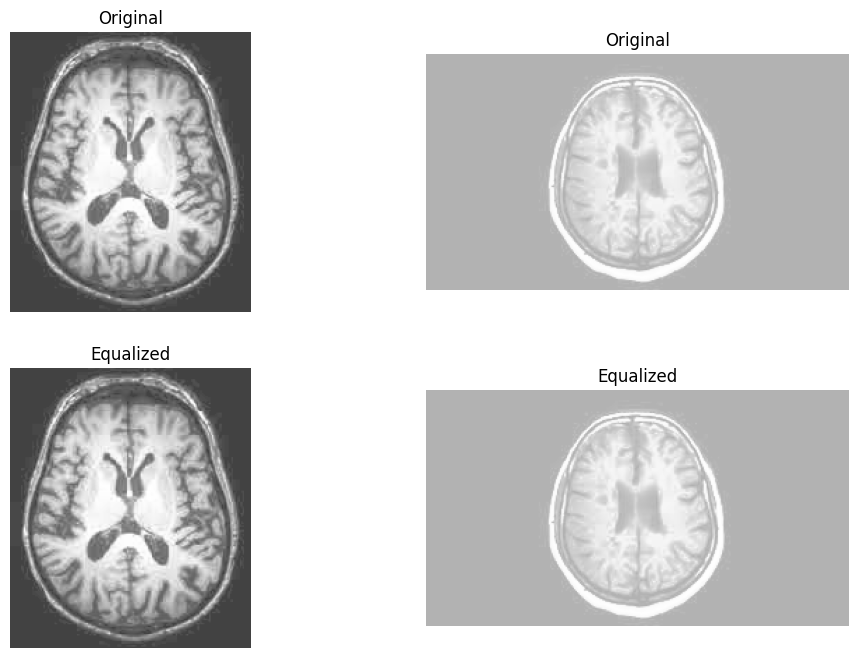

In [221]:
apply_histogram_equalization_and_display(h_images)

## <span style="color:green; font-style:italic; text-decoration:underline;"> 7) - quantization of the images . </span>

In [235]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.gridspec import GridSpec

def apply_quantization_and_display(images, n_colors=16):
    quantized_images = []
    for image in images:
        # Flatten the image for KMeans
        flat_image = image.reshape(-1, 3)
        kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(flat_image)
        quantized_image = kmeans.cluster_centers_[kmeans.labels_].reshape(image.shape)
        quantized_images.append(quantized_image)
    num_images = len(images)
    num_cols = 2  # 2 columns for each image (original and quantized)
    num_rows = (num_images + 1) // num_cols  # Calculate the number of rows

    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(num_rows, num_cols)
    try  : 
        for i in range(num_images):
            row, col = divmod(i, num_cols)
            ax1 = fig.add_subplot(gs[row * 2, col])
            ax1.imshow(images[i])
            ax1.axis('off')
            ax1.set_title("Original")
            ax2 = fig.add_subplot(gs[row * 2 + 1, col])
            ax2.imshow(quantized_images[i])
            ax2.axis('off')
            ax2.set_title("Quantized")

        plt.tight_layout()
    except : pass
    plt.show()

###  <span style="color:orange ; font-style:italic; "> ---- > the  quantization of   the sick brain images : </span>

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


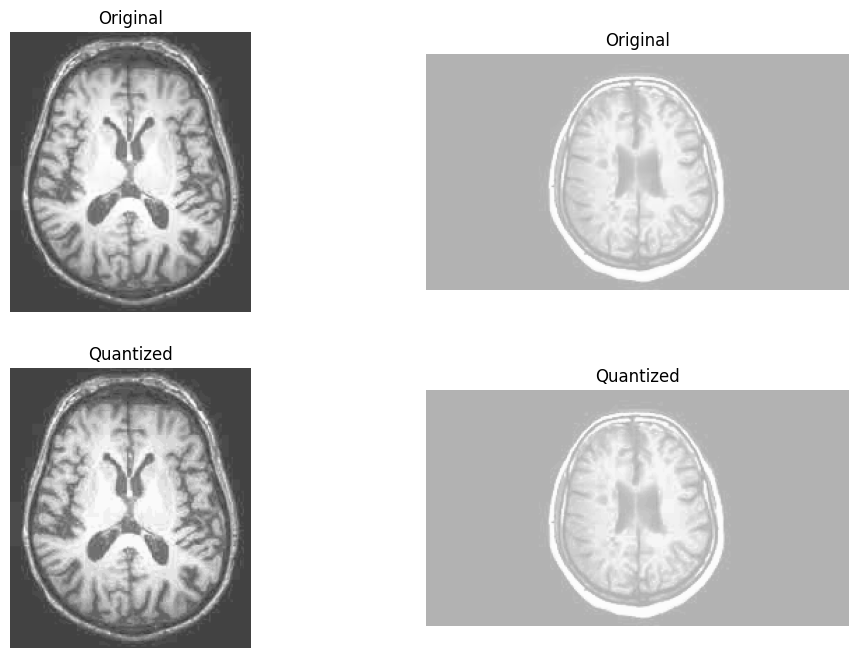

In [236]:
apply_quantization_and_display(h_images, n_colors=16)

###  <span style="color:orange ; font-style:italic; "> ---- >  the quantization  of the sick brain images : </span>

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


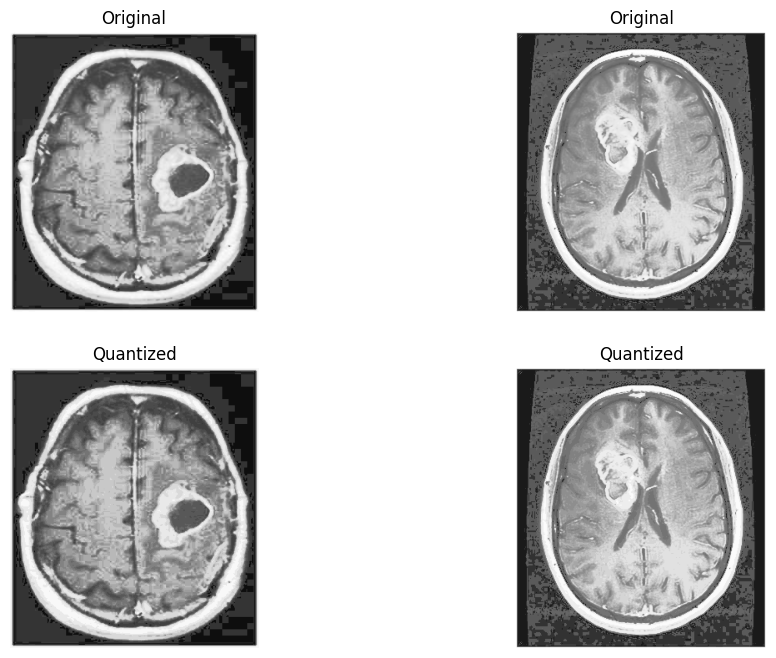

In [234]:
apply_quantization_and_display(s_images, n_colors=16)

# <span style="color:red; font-style:italic; text-decoration:underline;"> B) - Edge detection . </span>

## <span style="color:green; font-style:italic; text-decoration:underline;"> 1) - Edge detection with pass-hout filter </span>

### <span style="color:brown; font-style:italic; text-decoration:underline;"> a) - Edge detection with pass-hout filter : dradient approche</span>

### <span style="color:brown; font-style:italic; text-decoration:underline;"> b) - Edge detection with pass-hout filter : laplacien approche</span>

In [ ]:
https://watermark.silverchair.com/020023_1_online.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAABYEwggV9BgkqhkiG9w0BBwagggVuMIIFagIBADCCBWMGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMQUmArYcHCC9I-GR2AgEQgIIFNBPUVe0iWCkRGZ27mfhrA3lzGPUzVhWVdTGiKPrbq-CZrIrKZYC-2XFGeWfG4YIoAZ6a5lkfrhpWAT9akkf45FI72clMVKRxHnp_lU-8H9Rd9GBLI-CkBb0Q16Z2gyknWxtzZ5EaY29-YvhTqUe7ZCyd_Zk-ArwfkKKfLTnTMZJtGeX8oGQmA2c_2vvbR4S3iZd9Mn3iC0QyxQl4bf8phvcGVd0rhHzERLGZ6XHXLhrCzxLaVwD0DLFkpDMvh-TgaeUa1O0YUrEHh-LBVDcgMD-9c2B7ITp6b20Ops_VeU5NPJM2YS0NKtmfGEieeQU0BSpAFdicBDgOwoRLh_IItxlwZs9ecforb7C253oJh-XiIrcNGCPWS0MPQ8rlFcCnuzExuuyJ6NGW1qYw6FT2-InWiuDHtkUmh1pGKVytBQAYkdHpqU3io14hAO5gtLx2VAJNKuVOTyVKjfuMrUYHa104H3R_x7sCorQXuIqAy1JtwdUDAmGWsdcDWUncf6LuGBQ4HbCOgGwpg6wcOdLzoCbSNi9RiEWJseSi56ta_Z_hvNnTDv2qtx236NrwXhI39hh87hZuQrZijlulZ05unzp-nQ7rbCSvjV_Y3ov2ksOeRv8O3ZlPUVUkfvqF7PTjSw69-OoBjool-C24NDH5-Ok7STUUzz5xssak6ZPBpKDhejiryS2fn7xWNLeJGw21WcEXc4oRO9ul49Gc4tHgMxjfx__IvjYGWU-vAu0MdzAy1FERk7e7EIWfdwZdoK5WEBxix_VL-eeoBs0dBU6ywa7KE1sPlk-k-LVTRrczX_8kQtlRgCqPX8FQ9Ro4_KBpuikermHqs01hlqUODwyoRBugrPNBXytp2SvsGtlLRRwpmx9iZim_4wl0DG0J-tfhD9Hg2b4a2h0sGDPGKXMqk8B8O1mSOeJFKuq898V5uN9HW922l4ts0zr0EI1WR66TePb4ufEEvj2NWIEleMECeO3lw82E2cmV6h6K4eQaW6y6gB6UNtFHhmc1BUaEUvR7umPMNo49cz5MMJa-8Vlk8B8OsJ4UBksyxWrVt4Sprc1I6n1q-IOGzERlJFLR_JphY_CoWPt_Hik6_SKEXAIwCMazcs0aXoF8pPLvs2VGO3KrRXMki_SmXh8w_vzuydD6F8365BgKjuqj06tJdw6ST2LIMhZKD2ebckMWB1C-FVtty1N47oSVNp4OTjMd5D74014ui8j11zxsonxfUl1KzkKzb9ldNU9wIIwgzrUDDX5zmCphZO_VGndx24BGLSvBPQ-T_9TfD3pzb_6RIwpUu6zbLM66zuItUSSk4gNQm8kJWDLL2fJxcM1kQdii2SHeYQZZ0vxx_02bfE4QHs9Yw_Jj5YV7jUzAuIXV584DVaW0fw0U5BENC5BdC0rwPp-vurXExD5_7TxLo6i0nZlkxfzkc8F6KvpXaOmuBoTC00nKj3XFgYPBLm-EqEQkdDA9lm9FeQgH1D5mUt8cmnNUehvtu_dpvLrfFmb1ztYC2_wccxHxvalnKZW2H9_LZNcgC0_gBcGwvzRnJkp01eW6JcUdtHbuSLDTWfA_1Uzkws4sw32vgT4oMpYs0C6xWDmkMyFYbXjodL3_rusZ0II2w2N_ExbfA2m8_6_6MyEtkyLzL2omqvn4k-33hKQxGMqFB1bbMgyYTl03hOHEcjXR4jOEAyd3gEIOTNP4xVsmHqHU6lztBQtr9fEv_BcdG11Epq3Jr9w4Y5AwW-W6ZlX36z5_SPsBU3jOdSMJtiMpyHbu2CB8Cw